# Cross-resonance: fidelity and leakage plot

In [160]:
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy import constants
from typing import List, Dict
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'cm'
import copy
import json

from IPython.display import display, Latex

In [161]:
with open('data_cr_transmon_fluxonium/cr_fidelity_leakage.txt') as file_data:
    result = json.load(file_data)


In [174]:
def plot_cr_fidelity_leakage(
    result: List,
    opt={'fs': 20, 'lw': 2.0, 'ls': 16, 'fsl':18, "ms":8},
    save=False
):
#     if dark:
#         plt.style.use('dark_background')
#         color_plot = 'white'
#     else:
#         plt.style.use('default')
#         color_plot = 'black'
        
    matplotlib.rcParams['mathtext.fontset'] = 'cm'
    
    freq = [res["transm_freq"] for res in result]
    infid = [1 - res["fidelity"] for res in result]
    infid_noisy = [1 - res["fidelity_noisy"] for res in result]
    l1 = [res["L1"] for res in result]
    l1_noisy = [res["L1_noisy"] for res in result]
    
    fig, ax = plt.subplots(2, figsize=(6, 12))
    
    colors = ["black", "silver"]
    
    n = len(freq)
    step = 1
    ax[0].semilogy(freq[0:n:step], infid_noisy[0:n:step], color=colors[1], marker="X", markersize=opt["ms"], linewidth=opt["lw"], 
                   label="noisy")
    ax[0].semilogy(freq[0:n:step], infid[0:n:step], color=colors[0], marker="o", markersize=opt["ms"], linewidth=opt["lw"], \
                  label="noiseless")
    
    ax[1].semilogy(freq[0:n:step], l1_noisy[0:n:step], color=colors[1], marker="X", markersize=opt["ms"], linewidth=opt["lw"], 
                  label="noisy")
    ax[1].semilogy(freq[0:n:step], l1[0:n:step], color=colors[0], marker="o", markersize=opt["ms"], linewidth=opt["lw"], 
                  label="noiseless")
    
    x_ticks = [4.2 + 0.2*x for x in range(9)]
    x_ticks_latex = ['$4.2$', '$4.4$', '$4.6$', '$4.8$', '$5.0$', '$5.2$', '$5.4$', '$5.6$', '$5.8$']
    y_ticks = [0.01, 0.1]
    y_ticks_latex = ['$10^{-2}$', '$10^{-1}$']
    ax[0].set_xticks(x_ticks)
    ax[0].set_xticklabels(x_ticks_latex)
    ax[0].set_yticks(y_ticks)
    ax[0].set_yticklabels(y_ticks_latex)
    ax[0].tick_params(axis='both', labelsize=opt["ls"])
    y_ticks = [10**(-y) for y in range(1, 8)]
    y_ticks_latex = ['$10^{-1}$', '$10^{-2}$', '$10^{-3}$', '$10^{-4}$', '$10^{-5}$', '$10^{-6}$', '$10^{-7}$']
    ax[1].set_xticks(x_ticks)
    ax[1].set_xticklabels(x_ticks_latex)
    ax[1].set_yticks(y_ticks)
    ax[1].set_yticklabels(y_ticks_latex)
    ax[1].tick_params(axis='both', labelsize=opt["ls"])
    
    ax[1].set_xlabel('$\\omega_t/2 \\pi \, (\\mathrm{GHz})$', fontsize=opt["fs"])
    ax[0].set_ylabel('$1 - F_{\\mathrm{gate}}$', fontsize=opt["fs"])
    ax[1].set_ylabel('$L_1$', fontsize=opt["fs"])
    
    ax[0].legend(loc='best', fontsize=opt["fs"])
    ax[1].legend(loc='best', fontsize=opt["fs"])
    
    if save:
        plt.savefig("cr_fidelity_leakage.svg")
    
    
    
    plt.show()

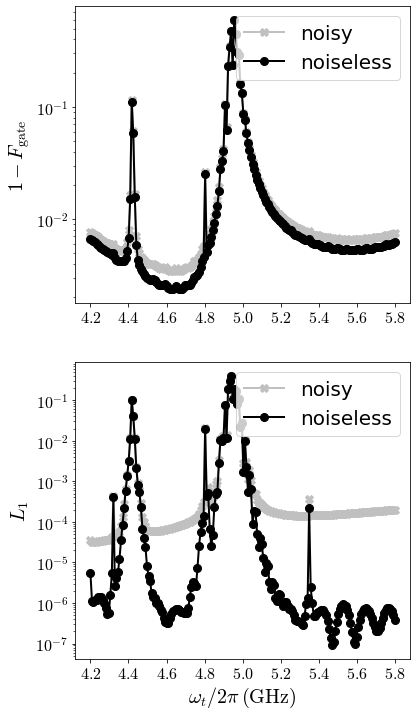

In [175]:
plot_cr_fidelity_leakage(result, save=True)